In [13]:
from roboflow import Roboflow

# Configuração
API_KEY = "npZkALCtAevgZlitajPx"  # Substitua pela sua chave de API
MODEL_NAME = "detect_color_rectangle"  # Nome do seu modelo no Roboflow
VERSION = 1  # Versão do modelo
image_path = "D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens/5.95.A.1_compressed.jpg"  # Caminho para a imagem local

try:
    # Inicializar o cliente do Roboflow
    rf = Roboflow(api_key=API_KEY)

    # Obter o projeto e o modelo
    project = rf.workspace().project(MODEL_NAME)
    model = project.version(VERSION).model

    # Fazer a inferência na imagem local
    prediction = model.predict(image_path, confidence=40, overlap=30)

    # Exibir o resultado como JSON
    print("Predição (JSON):", prediction.json())

    # Salvar a imagem com as predições desenhadas
    prediction.save("prediction.jpg")
    print("A imagem com as predições foi salva como 'prediction.jpg'.")

except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado no caminho '{image_path}'")
except Exception as e:
    print(f"Erro inesperado: {e}")

loading Roboflow workspace...
loading Roboflow project...
Predição (JSON): {'predictions': [{'x': 2077.0, 'y': 2599.5, 'width': 2050.0, 'height': 667.0, 'confidence': 0.7473887205123901, 'class': 'rectangles', 'class_id': 0, 'detection_id': '03bad5f5-d708-4ac9-a6d8-b4e41b11e700', 'image_path': 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens/5.95.A.1_compressed.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '4128', 'height': '3096'}}
A imagem com as predições foi salva como 'prediction.jpg'.


In [17]:
from PIL import Image

image_path = "C:/Users/lucas/Downloads/1.25.A.1.jpg"

try:
    # Abrir e verificar a imagem
    img = Image.open(image_path)
    img.verify()  # Verifica se é uma imagem válida
    print("O arquivo é uma imagem válida!")
except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado no caminho '{image_path}'")
except Exception as e:
    print(f"Erro: {e}")

    


Erro: cannot identify image file 'C:/Users/lucas/Downloads/1.25.A.1.jpg'


In [12]:
import os

file_path = "D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens/5.95.A.1.jpg"
file_size = os.path.getsize(file_path) / (1024 * 1024)  # Tamanho em MB
print(f"Tamanho do arquivo: {file_size:.2f} MB")


from PIL import Image

input_path = "D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens/5.95.A.1.jpg"
output_path = "D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens/5.95.A.1_compressed.jpg"

try:
    # Abrir a imagem
    with Image.open(input_path) as img:
        # Salvar a imagem com qualidade reduzida (ajustar o valor para balancear qualidade/tamanho)
        img.save(output_path, format="JPEG", quality=60)
        print(f"Imagem compactada e salva em: {output_path}")
except Exception as e:
    print(f"Erro ao compactar a imagem: {e}")

file_size = os.path.getsize(output_path) / (1024 * 1024)  # Tamanho em MB
print(f"Tamanho do arquivo: {file_size:.2f} MB")


Tamanho do arquivo: 2.45 MB
Imagem compactada e salva em: D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens/5.95.A.1_compressed.jpg
Tamanho do arquivo: 0.33 MB


In [3]:
import os
from PIL import Image

# Diretórios de entrada e saída
input_dir = "D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens"
output_dir = "D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens/Compressed"

# Criar o diretório de saída, se não existir
os.makedirs(output_dir, exist_ok=True)

# Qualidade da compactação
compression_quality = 60

# Iterar sobre todos os arquivos do diretório de entrada
for filename in os.listdir(input_dir):
    input_path = os.path.join(input_dir, filename)
    output_path = os.path.join(output_dir, filename)

    try:
        # Verificar se o arquivo é uma imagem suportada
        with Image.open(input_path) as img:
            # Compactar e salvar no diretório de saída
            img.save(output_path, format="JPEG", quality=compression_quality)
            input_size = os.path.getsize(input_path) / (1024 * 1024)  # Tamanho original em MB
            output_size = os.path.getsize(output_path) / (1024 * 1024)  # Tamanho compactado em MB
            print(f"{filename} compactado: {input_size:.2f} MB -> {output_size:.2f} MB")
    except Exception as e:
        print(f"Erro ao processar {filename}: {e}")


Erro ao processar 1.25.A.1.jpg: cannot identify image file 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens\\1.25.A.1.jpg'
Erro ao processar 1.25.A.2.jpg: cannot identify image file 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens\\1.25.A.2.jpg'
Erro ao processar 1.25.A.3.jpg: cannot identify image file 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens\\1.25.A.3.jpg'
Erro ao processar 1.25.N.2.jpg: cannot identify image file 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens\\1.25.N.2.jpg'
Erro ao processar 1.25.N.3.jpg: cannot identify image file 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens\\1.25.N.3.jpg'
Erro ao processar 1.35.A.1.jpg: cannot identify image file 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens\\1.35.A.1.jpg'
Erro ao processar 1.35.A.2.jpg: cannot identify image file 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens\\1.35.A.2.jpg'
Erro ao processar 1.35.A.3.jpg: cannot identify image file 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens

In [16]:
from PIL import Image

input_path = "D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens/1.25.A.1.jpg"
output_path = "D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens/1.25.A.1_fixed.jpg"

try:
    # Tenta abrir e salvar a imagem como JPG
    with Image.open(input_path) as img:
        img.convert("RGB").save(output_path, format="JPEG")
        print(f"Imagem corrigida e salva em: {output_path}")
except Exception as e:
    print(f"Erro ao corrigir a imagem: {e}")


Erro ao corrigir a imagem: cannot identify image file 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens/1.25.A.1.jpg'


In [4]:
import os
import json
from roboflow import Roboflow

# Configuração
API_KEY = "npZkALCtAevgZlitajPx"  # Substitua pela sua chave de API
MODEL_NAME = "detect_color_rectangle"  # Nome do seu modelo no Roboflow
VERSION = 1  # Versão do modelo
input_dir = "D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens/compressed"  # Diretório com as imagens compactadas
output_dir = "D:/Correcao-de-Imagem-Sistemas-Distribuidos/Predictions"  # Diretório onde as predições serão salvas
coordinates_dir = os.path.join(output_dir, "coordinates")  # Diretório para coordenadas

# Criar os diretórios de saída, se não existirem
os.makedirs(output_dir, exist_ok=True)
os.makedirs(coordinates_dir, exist_ok=True)

try:
    # Inicializar o cliente do Roboflow
    rf = Roboflow(api_key=API_KEY)

    # Obter o projeto e o modelo
    project = rf.workspace().project(MODEL_NAME)
    model = project.version(VERSION).model

    # Iterar sobre todos os arquivos do diretório de imagens
    for filename in os.listdir(input_dir):
        # Filtrar apenas imagens JPG ou JPEG
        if filename.lower().endswith(('.jpg', '.jpeg')):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, f"prediction_{filename}")
            coordinates_path = os.path.join(coordinates_dir, f"{os.path.splitext(filename)[0]}_coordinates.json")
            
            try:
                # Fazer a inferência na imagem local
                prediction = model.predict(input_path, confidence=40, overlap=30)

                # Salvar a imagem com as predições desenhadas
                prediction.save(output_path)
                print(f"A imagem com as predições foi salva como '{output_path}'.")

                # Obter e salvar as coordenadas
                predictions_data = prediction.json()
                with open(coordinates_path, 'w') as coord_file:
                    json.dump(predictions_data, coord_file, indent=4)
                print(f"As coordenadas foram salvas como '{coordinates_path}'.")

            except Exception as e:
                print(f"Erro ao processar {filename}: {e}")

except Exception as e:
    print(f"Erro inesperado: {e}")


loading Roboflow workspace...
loading Roboflow project...
A imagem com as predições foi salva como 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Predictions\prediction_2.25.A.1.jpg'.
As coordenadas foram salvas como 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Predictions\coordinates\2.25.A.1_coordinates.json'.
A imagem com as predições foi salva como 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Predictions\prediction_2.25.A.2.jpg'.
As coordenadas foram salvas como 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Predictions\coordinates\2.25.A.2_coordinates.json'.
A imagem com as predições foi salva como 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Predictions\prediction_2.25.A.3.jpg'.
As coordenadas foram salvas como 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Predictions\coordinates\2.25.A.3_coordinates.json'.
A imagem com as predições foi salva como 'D:/Correcao-de-Imagem-Sistemas-Distribuidos/Predictions\prediction_2.25.N.1.jpg'.
As coordenadas foram salvas como 'D:/Correcao-de-Imagem-

In [5]:
import os
import json
from PIL import Image

# Diretórios de entrada e saída
images_dir = "D:/Correcao-de-Imagem-Sistemas-Distribuidos/Imagens/compressed"  # Diretório das imagens originais
coordinates_dir = "D:/Correcao-de-Imagem-Sistemas-Distribuidos/Predictions/coordinates"  # Coordenadas JSON
output_dir = "D:/Correcao-de-Imagem-Sistemas-Distribuidos/Cortes"  # Diretório onde as imagens recortadas serão salvas

# Criar o diretório de saída, se não existir
os.makedirs(output_dir, exist_ok=True)

# Função para recortar e salvar as imagens
def crop_image(image_path, coordinates, output_path, crop_index):
    """
    Recorta a imagem com base nas coordenadas fornecidas.
    """
    try:
        # Abrir a imagem original
        img = Image.open(image_path)
        
        # Extrair coordenadas
        x = coordinates['x']
        y = coordinates['y']
        width = coordinates['width']
        height = coordinates['height']
        
        # Calcular o retângulo de recorte (bounding box)
        left = int(x - width / 2)
        top = int(y - height / 2)
        right = int(x + width / 2)
        bottom = int(y + height / 2)
        
        # Recortar a imagem
        cropped_img = img.crop((left, top, right, bottom))
        
        # Salvar a imagem recortada
        cropped_img.save(output_path)
        print(f"Imagem recortada salva em: {output_path}")

    except Exception as e:
        print(f"Erro ao recortar a imagem: {e}")

# Iterar pelos arquivos JSON de coordenadas
for json_file in os.listdir(coordinates_dir):
    if json_file.endswith('.json'):
        json_path = os.path.join(coordinates_dir, json_file)
        
        # Carregar o JSON
        with open(json_path, 'r') as file:
            data = json.load(file)
        
        # Nome da imagem original
        image_name = json_file.replace('_coordinates.json', '')
        image_path = os.path.join(images_dir, image_name + ".jpg")  # Ajuste se for outra extensão

        # Verificar se a imagem existe
        if not os.path.exists(image_path):
            print(f"Imagem não encontrada: {image_path}")
            continue
        
        # Iterar pelas predições no JSON
        for idx, prediction in enumerate(data['predictions']):
            # Criar um nome único para a imagem recortada
            output_path = os.path.join(output_dir, f"{image_name}_crop_{idx + 1}.jpg")
            
            # Recortar e salvar a imagem
            crop_image(image_path, prediction, output_path, idx + 1)


Imagem recortada salva em: D:/Correcao-de-Imagem-Sistemas-Distribuidos/Crops\2.25.A.1_crop_1.jpg
Imagem recortada salva em: D:/Correcao-de-Imagem-Sistemas-Distribuidos/Crops\2.25.A.2_crop_1.jpg
Imagem recortada salva em: D:/Correcao-de-Imagem-Sistemas-Distribuidos/Crops\2.25.A.3_crop_1.jpg
Imagem recortada salva em: D:/Correcao-de-Imagem-Sistemas-Distribuidos/Crops\2.25.N.1_crop_1.jpg
Imagem recortada salva em: D:/Correcao-de-Imagem-Sistemas-Distribuidos/Crops\2.25.N.2_crop_1.jpg
Imagem recortada salva em: D:/Correcao-de-Imagem-Sistemas-Distribuidos/Crops\2.25.N.3_crop_1.jpg
Imagem recortada salva em: D:/Correcao-de-Imagem-Sistemas-Distribuidos/Crops\2.35.A.1_crop_1.jpg
Imagem recortada salva em: D:/Correcao-de-Imagem-Sistemas-Distribuidos/Crops\2.35.A.2_crop_1.jpg
Imagem recortada salva em: D:/Correcao-de-Imagem-Sistemas-Distribuidos/Crops\2.35.A.3_crop_1.jpg
Imagem recortada salva em: D:/Correcao-de-Imagem-Sistemas-Distribuidos/Crops\2.35.N.1_crop_1.jpg
Imagem recortada salva em: D:/

In [5]:
from PIL import Image
from sklearn.cluster import KMeans
import numpy as np

# Carregar a imagem
image_path = "D:/Correcao-de-Imagem-Sistemas-Distribuidos/Cortes/2.75.A.1_crop_1.jpg"
image = Image.open(image_path).convert("RGB")

# Redimensionar para acelerar o processamento (opcional)
image_resized = image.resize((100, 100))
image_array = np.array(image_resized).reshape(-1, 3)  # Convert to 2D array (pixels x RGB)

# Usar KMeans para agrupar as cores (n_clusters = número de cores esperado)
n_clusters = 25  # Supondo 24 cores na imagem
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(image_array)

# Obter as cores principais
colors = kmeans.cluster_centers_
colors = colors.astype(int)  # Converter para inteiros

# Exibir as cores extraídas
colors


array([[133,  32,  43],
       [ 29,  25,  28],
       [120, 115, 111],
       [ 83,  76,  73],
       [163, 108,  20],
       [181, 177, 173],
       [ 53,  59,  62],
       [ 55,  47,  31],
       [ 69, 139, 121],
       [109, 125,  25],
       [ 28,  90,  28],
       [ 14,  83, 109],
       [ 30,  40,  93],
       [108,  21,  18],
       [142, 101,  75],
       [178, 150,  24],
       [142,  71,  18],
       [ 52,  19,  43],
       [154, 149, 145],
       [ 16,  20,  65],
       [ 58,  75, 100],
       [120,  26,  70],
       [ 96,  82, 110],
       [ 23,  18,  17],
       [ 42,  17,  16]])

In [6]:
from PIL import Image
from sklearn.cluster import KMeans
import numpy as np

# Carregar a imagem
image_path = "D:/Correcao-de-Imagem-Sistemas-Distribuidos/Cortes/2.75.A.1_crop_1.jpg"
image = Image.open(image_path).convert("RGB")

# Redimensionar para acelerar o processamento (opcional)
image_resized = image.resize((100, 100))
image_array = np.array(image_resized).reshape(-1, 3)  # Convert to 2D array (pixels x RGB)

# Usar KMeans para agrupar as cores (n_clusters = número de cores esperado)
n_clusters = 24  # Supondo 24 cores na imagem
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(image_array)

# Obter as cores principais
colors = kmeans.cluster_centers_
colors = colors.astype(int)  # Converter para inteiros

# Exibir as cores extraídas
colors


array([[133,  32,  43],
       [ 28,  24,  28],
       [120, 115, 111],
       [ 83,  76,  73],
       [163, 108,  20],
       [181, 177, 173],
       [ 53,  59,  62],
       [ 55,  47,  31],
       [ 69, 139, 121],
       [109, 125,  25],
       [ 29,  90,  28],
       [ 14,  83, 109],
       [ 30,  40,  93],
       [108,  21,  18],
       [142, 101,  75],
       [178, 150,  24],
       [142,  71,  18],
       [ 52,  18,  35],
       [154, 149, 145],
       [ 16,  20,  65],
       [ 58,  75, 100],
       [119,  26,  70],
       [ 96,  82, 110],
       [ 25,  18,  16]])

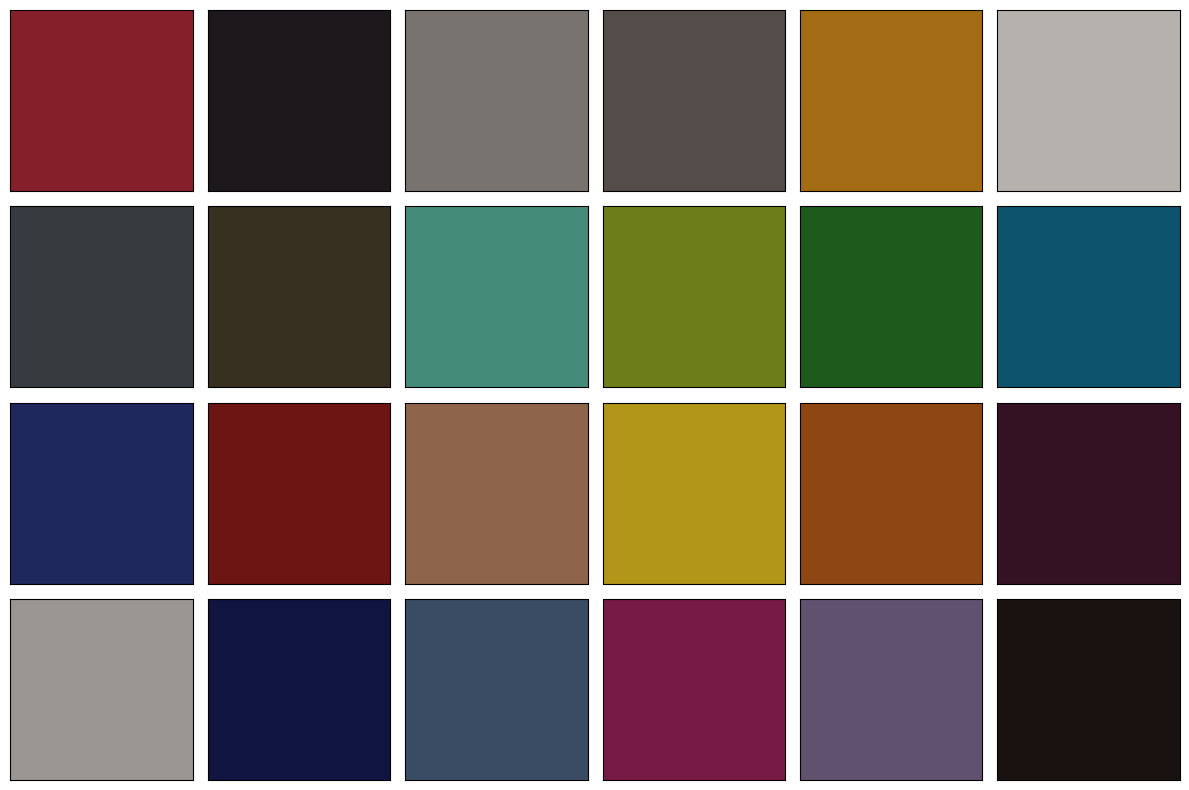

In [ ]:
import matplotlib.pyplot as plt

# Definir as cores fornecidas
colors = np.array([[133,  32,  43],
       [ 29,  25,  28],
       [120, 115, 111],
       [ 83,  76,  73],
       [163, 108,  20],
       [181, 177, 173],
       [ 53,  59,  62],
       [ 55,  47,  31],
       [ 69, 139, 121],
       [109, 125,  25],
       [ 28,  90,  28],
       [ 14,  83, 109],
       [ 30,  40,  93],
       [108,  21,  18],
       [142, 101,  75],
       [178, 150,  24],
       [142,  71,  18],
       [ 52,  19,  43],
       [154, 149, 145],
       [ 16,  20,  65],
       [ 58,  75, 100],
       [120,  26,  70],
       [ 96,  82, 110],
       [ 23,  18,  17],
       [ 42,  17,  16]])

# Configurar a grade para exibir as cores
rows, cols = 4, 6  # 4 linhas e 6 colunas
fig, ax = plt.subplots(rows, cols, figsize=(12, 8))

# Preencher a grade com as cores
for i, ax in enumerate(fig.axes):
    if i < len(colors):
        color = colors[i] / 255.0  # Normalizar para intervalo [0, 1]
        ax.set_facecolor(color)
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.axis("off")

# Exibir a visualização
plt.tight_layout()
plt.show()


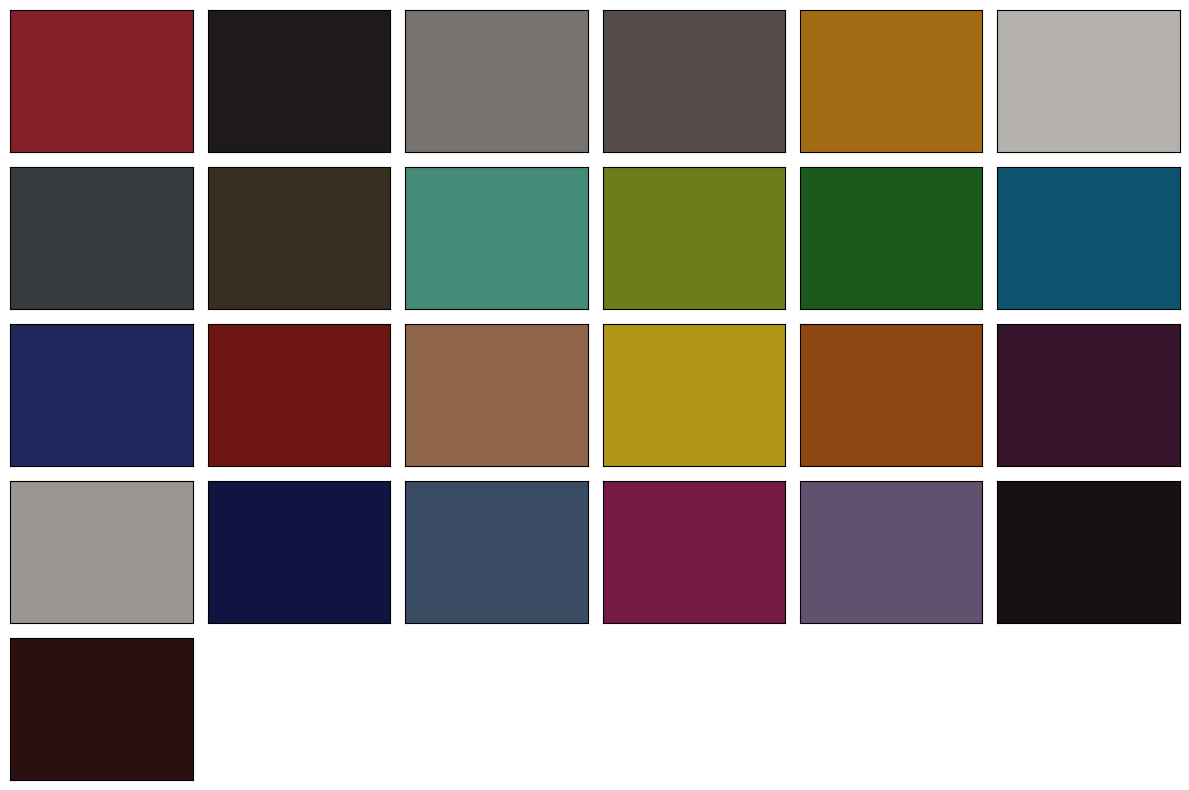

In [12]:
import matplotlib.pyplot as plt

# Definir as cores fornecidas
colors = np.array([[133,  32,  43],
       [ 29,  25,  28],
       [120, 115, 111],
       [ 83,  76,  73],
       [163, 108,  20],
       [181, 177, 173],
       [ 53,  59,  62],
       [ 55,  47,  31],
       [ 69, 139, 121],
       [109, 125,  25],
       [ 28,  90,  28],
       [ 14,  83, 109],
       [ 30,  40,  93],
       [108,  21,  18],
       [142, 101,  75],
       [178, 150,  24],
       [142,  71,  18],
       [ 52,  19,  43],
       [154, 149, 145],
       [ 16,  20,  65],
       [ 58,  75, 100],
       [120,  26,  70],
       [ 96,  82, 110],
       [ 23,  18,  17],
       [ 42,  17,  16]])

# Configurar a grade para exibir as cores
rows, cols = 5, 6  # 4 linhas e 6 colunas
fig, ax = plt.subplots(rows, cols, figsize=(12, 8))

# Preencher a grade com as cores
for i, ax in enumerate(fig.axes):
    if i < len(colors):
        color = colors[i] / 255.0  # Normalizar para intervalo [0, 1]
        ax.set_facecolor(color)
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.axis("off")

# Exibir a visualização
plt.tight_layout()
plt.show()


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def extract_colors(image_path, grid_rows, grid_cols, margin=5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape
    block_height = height // grid_rows
    block_width = width // grid_cols
    colors = []
    for row in range(grid_rows):
        for col in range(grid_cols):
            start_x = col * block_width + margin
            start_y = row * block_height + margin
            end_x = (col + 1) * block_width - margin
            end_y = (row + 1) * block_height - margin
            block = image[start_y:end_y, start_x:end_x]
            mask = np.all(block > [10, 10, 10], axis=-1)
            if np.any(mask):
                average_color = block[mask].mean(axis=0)
                colors.append(average_color)
            else:
                colors.append([0, 0, 0])
    return np.array(colors)

def process_images_in_folder(folder_path, grid_rows, grid_cols, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
    results = {}
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        colors = extract_colors(image_path, grid_rows, grid_cols)
        results[image_file] = colors
        plt.figure(figsize=(10, 2))
        plt.imshow([colors / 255])
        plt.axis('off')
        plt.title(f"Cores extraídas - {image_file}")
        plt.savefig(os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_colors.png"))
        plt.close()
    return results

folder_path = "../Cortes"
output_folder = "../Cores"
grid_rows, grid_cols = 4, 6
results = process_images_in_folder(folder_path, grid_rows, grid_cols, output_folder)

import json
with open(os.path.join(output_folder, "colors.json"), "w") as f:
    json.dump({k: v.tolist() for k, v in results.items()}, f, indent=4)

print("Processamento concluído. Verifique os gráficos e o arquivo JSON gerado.")


Processamento concluído. Verifique os gráficos e o arquivo JSON gerado.
